<font color='Green' size='5'><b> ***🚜👨‍🌾🌾 Plant Disease Detection  🚜👨‍🌾🌾*** </b></font>


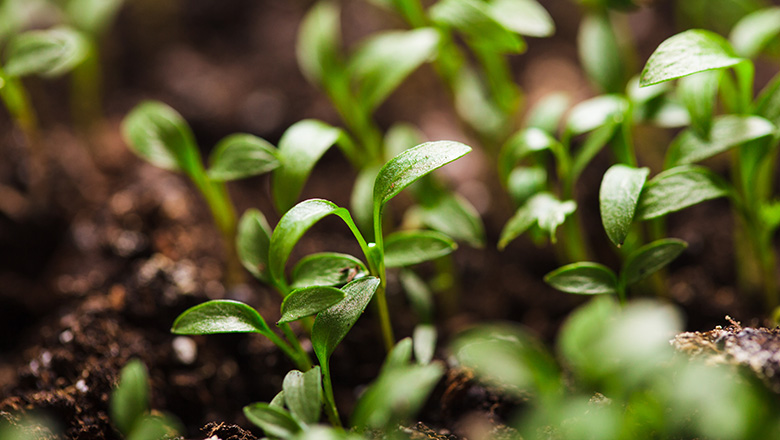

Identification of the plant diseases is the key to preventing the losses in the yield and quantity of the agricultural product. The studies of the plant diseases mean the studies of visually observable patterns seen on the plant. Health monitoring and disease detection on plant is very critical for sustainable agriculture.

It is very difficult to monitor the plant diseases manually. It requires tremendous amount of work, expertize in the plant diseases, and also require the excessive processing time. Hence, image processing is used for the detection of plant diseases.

Disease detection involves the steps like image acquisition, image pre-processing, image segmentation, feature extraction and classification.

<font color='Green' size='5'><b>1. Importing Libraries</b></font>


In [1]:
import cv2               as cv
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import urllib
import random
import os
import glob
import shutil
#import visualkeras
from imutils               import paths
from sklearn.utils         import shuffle
from urllib.request        import urlopen
from sklearn.decomposition import PCA
from IPython.display       import Image
from tqdm                  import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import cv2
import numpy as np
from PIL import Image


import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models              import Sequential, load_model
from tensorflow.keras.preprocessing       import image
from tensorflow.keras.utils               import to_categorical, plot_model
from tensorflow.keras.callbacks           import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers              import Conv2D,Flatten,MaxPooling2D,Dense,Dropout,SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img,array_to_img
from keras.layers                         import BatchNormalization, GlobalAveragePooling2D


import tensorflow as tf
from tensorflow.keras.applications import InceptionV3  # Pretrained InceptionV3 model
from tensorflow.keras.models import Model  # To define the model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D  # Custom layers
from tensorflow.keras.optimizers import Adam  # Optimizer for training
from IPython.display       import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Vérifiez si le dossier existe
directory = '/content/drive/MyDrive/PlantVillage'
if os.path.isdir(directory):
    print("Le dossier existe !")
else:
    print("Le dossier n'existe pas.")

Le dossier existe !


<font color='Green' size='5'><b>2. Import Data and Apply Data Preprocessing</b></font>


In [4]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from PIL import UnidentifiedImageError  # Importer l'exception pour gérer les erreurs d'image

# Chemin du dataset
data_dir = '/content/drive/MyDrive/PlantVillage'

# Vérifier si le dossier contient un sous-dossier unique "PlantVillage"
subdirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
if len(subdirs) == 1 and subdirs[0] == "PlantVillage":
    data_dir = os.path.join(data_dir, "PlantVillage")

print(f"Utilisation du dossier : {data_dir}")

# Définir la taille des images
img_size = (128, 128)

# Récupérer toutes les classes (dossiers uniquement)
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
classes.sort()
print(f"Classes trouvées : {classes}")

# Mapper les classes en indices numériques
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(classes)
label_mapping = dict(zip(classes, encoded_labels))
print(f"Mapping des classes : {label_mapping}")

# Fonction pour charger les images et leurs labels
def load_data_from_directory(directory, target_size=(128, 128), label_mapping=None):
    images = []
    labels = []

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):  # Vérifier si c'est un dossier
            continue

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            # Vérifier que c'est un fichier image valide
            if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                print(f"Fichier ignoré (non image) : {img_path}")
                continue

            try:
                img = load_img(img_path, target_size=target_size)  # Charger l'image
                img_array = img_to_array(img) / 255.0  # Normaliser entre 0 et 1
                images.append(img_array)
                labels.append(label_mapping[class_name])  # Associer l’image à son label
            except UnidentifiedImageError:
                print(f"⚠️ Erreur : Impossible de charger {img_path} (image corrompue ou invalide)")

    return np.array(images), np.array(labels)

# Charger les données
x_data, y_data = load_data_from_directory(data_dir, target_size=img_size, label_mapping=label_mapping)

Utilisation du dossier : /content/drive/MyDrive/PlantVillage/PlantVillage
Classes trouvées : ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Mapping des classes : {'Pepper__bell___Bacterial_spot': np.int64(0), 'Pepper__bell___healthy': np.int64(1), 'PlantVillage': np.int64(2), 'Potato___Early_blight': np.int64(3), 'Potato___Late_blight': np.int64(4), 'Potato___healthy': np.int64(5), 'Tomato_Bacterial_spot': np.int64(6), 'Tomato_Early_blight': np.int64(7), 'Tomato_Late_blight': np.int64(8), 'Tomato_Leaf_Mold': np.int64(9), 'Tomato_Septoria_leaf_spot': np.int64(10), 'Tomato_Spider_mites_Two_spotted_spider_mite': np.int

In [5]:
print(f"Shape des images : {x_data.shape}")
print(f"Shape des labels : {y_data.shape}")

Shape des images : (20790, 128, 128, 3)
Shape des labels : (20790,)


✅ Dossier trouvé : /content/drive/MyDrive/PlantVillage/PlantVillage


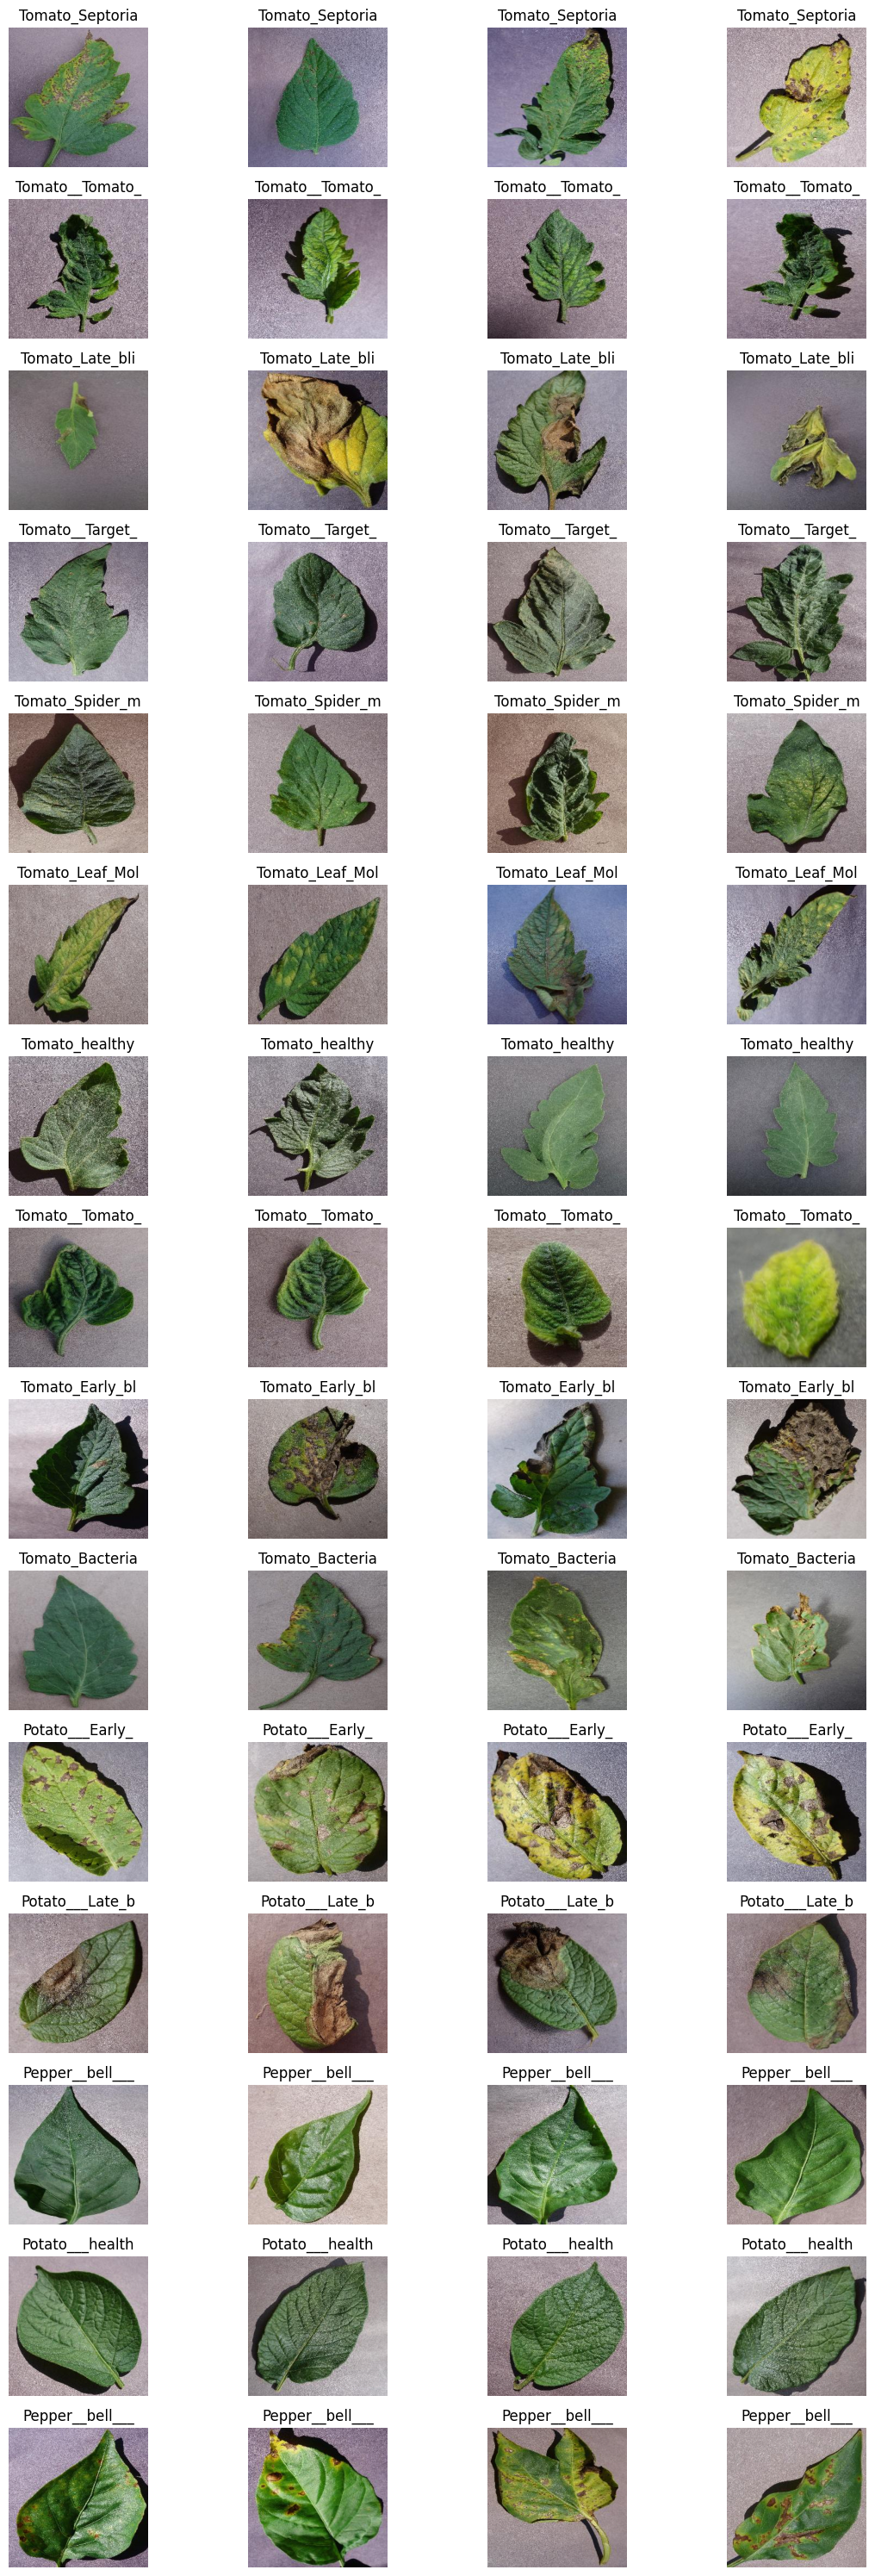

In [6]:
# Définir le répertoire des données
data_dir = '/content/drive/MyDrive/PlantVillage'
plant_village_path = os.path.join(data_dir, "PlantVillage")

# Vérifier si le répertoire existe
if not os.path.exists(plant_village_path):
    print("⚠️ Le dossier 'PlantVillage' n'existe pas.")
else:
    print("✅ Dossier trouvé :", plant_village_path)

# Fonction pour afficher des images de catégories spécifiques
def plot_specific_classes(data_dir, target_classes, num_samples=4):
    plant_village_path = os.path.join(data_dir, "PlantVillage")

    # Vérifier si le dossier existe
    if not os.path.exists(plant_village_path):
        print("⚠️ Le dossier 'PlantVillage' n'existe pas.")
        return

    # Lister les classes correspondant aux mots-clés
    classes = [cls for cls in os.listdir(plant_village_path) if os.path.isdir(os.path.join(plant_village_path, cls))]
    selected_classes = [cls for cls in classes if any(keyword.lower() in cls.lower() for keyword in target_classes)]

    if not selected_classes:
        print("⚠️ Aucune classe trouvée correspondant aux critères :", target_classes)
        return

    plt.figure(figsize=(12, len(selected_classes) * 2))

    for i, cls in enumerate(selected_classes):
        class_path = os.path.join(plant_village_path, cls)

        # Filtrer les images valides
        valid_extensions = (".jpg", ".jpeg", ".png")
        images = [img for img in os.listdir(class_path) if img.lower().endswith(valid_extensions)]

        if not images:
            print(f"⚠️ Aucune image trouvée pour la classe '{cls}'.")
            continue

        # Sélectionner un nombre défini d'images
        selected_images = random.sample(images, min(num_samples, len(images)))

        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(class_path, img_name)

            if not os.path.exists(img_path):
                print(f"❌ Fichier introuvable : {img_path}")
                continue

            img = cv2.imread(img_path)

            if img is None:
                print(f"❌ Impossible de charger l'image : {img_path}")
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Affichage
            plt.subplot(len(selected_classes), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(cls[:15])

    plt.tight_layout()
    plt.show()

# Classes spécifiques à afficher
target_classes = ["Healthy", "Tomato", "Potato", "Pepper"]

# Afficher les images
plot_specific_classes(data_dir, target_classes)

In [7]:
pip install rich

In [8]:
from rich.console import Console
from rich.table import Table

# Initialiser la console Rich
console = Console()

# Définir le répertoire principal des données
data_dir = '/content/drive/MyDrive/PlantVillage'

# Définir les chemins possibles (différentes casses)
possible_dirs = ["PlantVillage", "plantvillage"]

# Vérifier quel répertoire existe et récupérer son contenu
found_dirs = {}
for dir_name in possible_dirs:
    dir_path = os.path.join(data_dir, dir_name)

    if os.path.exists(dir_path) and os.path.isdir(dir_path):
        # Récupérer uniquement les sous-dossiers (évite les fichiers)
        classes = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
        found_dirs[dir_name] = sorted(classes)  # Trier les classes alphabétiquement

# Affichage avec Rich
if found_dirs:
    for name, classes in found_dirs.items():
        table = Table(title=f"📁 Classes found in '{name}'", title_style="bold cyan")

        table.add_column("Index", style="bold magenta", justify="center")
        table.add_column("Class Name", style="bold yellow")

        for i, class_name in enumerate(classes, start=1):
            table.add_row(str(i), class_name)

        console.print(table)

else:
    console.print("[bold red]⚠️ Aucun dossier 'PlantVillage' ou 'plantvillage' trouvé ![/bold red]")



          📁 Classes found in 'PlantVillage'           
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Class Name                                  ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│   1   │ Pepper__bell___Bacterial_spot               │
│   2   │ Pepper__bell___healthy                      │
│   3   │ PlantVillage                                │
│   4   │ Potato___Early_blight                       │
│   5   │ Potato___Late_blight                        │
│   6   │ Potato___healthy                            │
│   7   │ Tomato_Bacterial_spot                       │
│   8   │ Tomato_Early_blight                         │
│   9   │ Tomato_Late_blight                          │
│  10   │ Tomato_Leaf_Mold                            │
│  11   │ Tomato_Septoria_leaf_spot                   │
│  12   │ Tomato_Spider_mites_Two_spotted_spider_mite │
│  13   │ Tomato__Target_Spot                         │
│  14   │ Tomato__Tomato_YellowLeaf__Curl_Virus       │
│  15   │ Tomato__Tomato_mosaic_virus                 │
│  16   │ Tomato_healthy                              │
└───────┴─────────────────────────────────────────────┘

In [9]:
print("🌱 The total number of classes is :", len(classes))


🌱 The total number of classes is : 16


In [10]:
# Créer un dictionnaire avec le nombre d'images par classe
images_map = {}
for class_name in classes:
    images_map[class_name] = len(os.listdir(os.path.join(plant_village_path, class_name)))

# Convertir en DataFrame pour une visualisation propre
images_per_class = pd.DataFrame(images_map.values(), index=images_map.keys(), columns=["Number of Images"])
images_per_class

Number of Images
Pepper__bell___Bacterial_spot                            1063
Pepper__bell___healthy                                   1495
PlantVillage                                               15
Potato___Early_blight                                    1000
Potato___Late_blight                                     1000
Potato___healthy                                          152
Tomato_Bacterial_spot                                    2145
Tomato_Early_blight                                      1000
Tomato_Late_blight                                       1915
Tomato_Leaf_Mold                                          952
Tomato_Septoria_leaf_spot                                1771
Tomato_Spider_mites_Two_spotted_spider_mite              1676
Tomato__Target_Spot                                      1427
Tomato__Tomato_YellowLeaf__Curl_Virus                    3222
Tomato__Tomato_mosaic_virus                               382
Tomato_healthy                                           1591

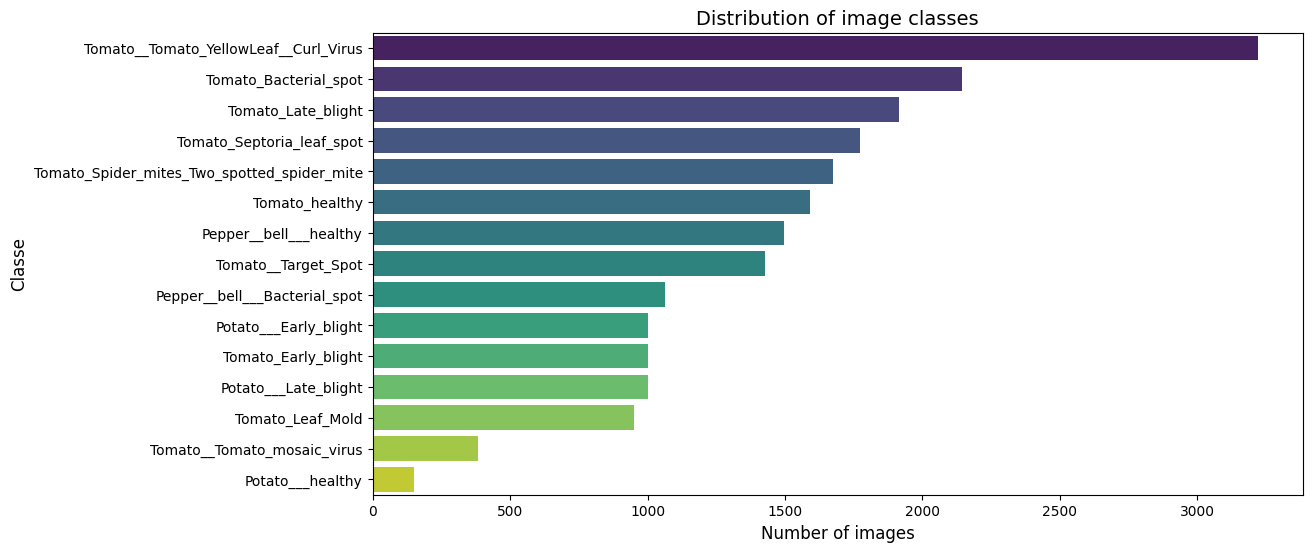

In [11]:
# Créer un DataFrame avec les labels
df = pd.DataFrame({'label': [list(label_mapping.keys())[list(label_mapping.values()).index(y)] for y in y_data]})

# Afficher la distribution des labels avec Seaborn
plt.figure(figsize=(12, 6))  # Ajuster la taille du graphique
sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette="viridis")

# Ajouter des titres et labels
plt.title("Distribution of image classes", fontsize=14)
plt.xlabel("Number of images", fontsize=12)
plt.ylabel("Classe", fontsize=12)

plt.show()


In [12]:
# 📂 Chemin du dataset
data_dir = '/content/drive/MyDrive/PlantVillage'

# Vérification du sous-dossier unique "PlantVillage"
subdirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
if len(subdirs) == 1 and subdirs[0] == "PlantVillage":
    data_dir = os.path.join(data_dir, "PlantVillage")

print(f"📂 Utilisation du dossier : {data_dir}")

📂 Utilisation du dossier : /content/drive/MyDrive/PlantVillage/PlantVillage


In [13]:
# 📏 Taille des images
img_size = (128, 128)


# 🔢 Encoder les labels (classe -> index)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(classes)
label_mapping = dict(zip(classes, encoded_labels))

print("\n🔢 Mapping des classes :")
for class_name, encoded in label_mapping.items():
    print(f" - {class_name} : {encoded}")




🔢 Mapping des classes :
 - Pepper__bell___Bacterial_spot : 0
 - Pepper__bell___healthy : 1
 - PlantVillage : 2
 - Potato___Early_blight : 3
 - Potato___Late_blight : 4
 - Potato___healthy : 5
 - Tomato_Bacterial_spot : 6
 - Tomato_Early_blight : 7
 - Tomato_Late_blight : 8
 - Tomato_Leaf_Mold : 9
 - Tomato_Septoria_leaf_spot : 10
 - Tomato_Spider_mites_Two_spotted_spider_mite : 11
 - Tomato__Target_Spot : 12
 - Tomato__Tomato_YellowLeaf__Curl_Virus : 13
 - Tomato__Tomato_mosaic_virus : 14
 - Tomato_healthy : 15


In [14]:
from sklearn.model_selection import train_test_split

# ⚠️ Supprimer les classes avec < 2 images
unique_classes, class_counts = np.unique(y_data, return_counts=True)
empty_classes = [cls for cls, count in zip(unique_classes, class_counts) if count < 2]

if empty_classes:
    print(f"⚠️ Classes ignorées (moins de 2 images) : {empty_classes}")
    valid_indices = np.isin(y_data, empty_classes, invert=True)
    x_data = x_data[valid_indices]
    y_data = y_data[valid_indices]

# 🎯 SPLIT (70% train, 15% val, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(
    x_data, y_data, test_size=0.3, random_state=42, stratify=y_data
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"✅ Données divisées :")
print(f"🔹 Train : {X_train.shape[0]} images")
print(f"🔹 Validation : {X_val.shape[0]} images")
print(f"🔹 Test : {X_test.shape[0]} images")


✅ Données divisées :
🔹 Train : 14553 images
🔹 Validation : 3118 images
🔹 Test : 3119 images


In [15]:
# 📊 Affichage des résultats
print(f"\n📊 Répartition des données :")
print(f"🟢 Entraînement : {len(X_train)} images")
print(f"🔵 Validation : {len(X_val)} images")
print(f"🔴 Test : {len(X_test)} images")

# 📊 Vérification de la distribution des classes après le split
unique_train, count_train = np.unique(y_train, return_counts=True)
unique_val, count_val = np.unique(y_val, return_counts=True)
unique_test, count_test = np.unique(y_test, return_counts=True)

print("\n✅ Distribution des classes après split :")
print(f"Train : {dict(zip(unique_train, count_train))}")
print(f"Validation : {dict(zip(unique_val, count_val))}")
print(f"Test : {dict(zip(unique_test, count_test))}")


📊 Répartition des données :
🟢 Entraînement : 14553 images
🔵 Validation : 3118 images
🔴 Test : 3119 images

✅ Distribution des classes après split :
Train : {np.int64(0): np.int64(744), np.int64(1): np.int64(1046), np.int64(3): np.int64(700), np.int64(4): np.int64(700), np.int64(5): np.int64(106), np.int64(6): np.int64(1502), np.int64(7): np.int64(700), np.int64(8): np.int64(1341), np.int64(9): np.int64(666), np.int64(10): np.int64(1240), np.int64(11): np.int64(1173), np.int64(12): np.int64(999), np.int64(13): np.int64(2255), np.int64(14): np.int64(267), np.int64(15): np.int64(1114)}
Validation : {np.int64(0): np.int64(160), np.int64(1): np.int64(225), np.int64(3): np.int64(150), np.int64(4): np.int64(150), np.int64(5): np.int64(23), np.int64(6): np.int64(321), np.int64(7): np.int64(150), np.int64(8): np.int64(287), np.int64(9): np.int64(143), np.int64(10): np.int64(265), np.int64(11): np.int64(251), np.int64(12): np.int64(214), np.int64(13): np.int64(483), np.int64(14): np.int64(58), 

In [16]:
# RGB to GRAY SCALE
X_train  = np.mean(X_train, axis=-1, keepdims=True)
X_val    = np.mean(X_val,   axis=-1, keepdims=True)
X_test   = np.mean(X_test,  axis=-1, keepdims=True)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(14553, 128, 128, 1)
(3118, 128, 128, 1)
(3119, 128, 128, 1)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Data augmentation is only for train set.
train_datagen = ImageDataGenerator(rescale           =1.0/255,   # Normalization
                                   zoom_range        =0.2,       # Random zoom
                                   width_shift_range =0.2,       # Random shift
                                   height_shift_range=0.2,       # Random shift
                                   fill_mode         ='constant',# Fill empty pixel with constant
                                   cval              =0)         # Fill with black

#No augmentation for test set.
test_datagen  = ImageDataGenerator(rescale = 1.0/255)

In [18]:
from tensorflow.keras.utils import to_categorical

# Si tes labels sont des entiers (0 à 15)
y_train = to_categorical(y_train, num_classes=16)
y_val   = to_categorical(y_val,   num_classes=16)
y_test  = to_categorical(y_test,  num_classes=16)


train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=32,
                                     shuffle=True)
val_generator   = test_datagen.flow (X_val,
                                     y_val,
                                     batch_size=32,
                                     shuffle=False)
test_generator  = test_datagen.flow (X_test,
                                     y_test,
                                     batch_size=32,
                                     shuffle=False)

In [19]:
print(len(y_train))
print(len(y_val))
print(len(y_test))

14553
3118
3119


<font color='Green' size='5'><b>3.Modeling</b></font>


In [20]:
model = Sequential()

#Convolution Layer 1
model.add(Conv2D(filters     =32,
                 kernel_size =(3,3),
                 padding     ="same",
                 input_shape =(128,128,1),
                 activation  ="relu"))
#Batch Normalization Layer 1
model.add(BatchNormalization())
#Pooling Layer 1
model.add(MaxPooling2D(pool_size=2,
                       strides=(2,2)))
#Convolution Layer 2
model.add(Conv2D(filters     =64,
                 kernel_size =(3,3),
                 padding     ="same",
                 activation  ="relu"))
#Batch Normalization Layer 2
model.add(BatchNormalization())
#Pooling Layer 2
model.add(MaxPooling2D(pool_size=2,
                       strides=(2,2)))
#Convolution Layer 3
model.add(Conv2D(filters     =64,
                 kernel_size =(3,3),
                 padding     ="same",
                 activation  ="relu"))
#Batch Normalization Layer 3
model.add(BatchNormalization())
#Pooling Layer 3
model.add(MaxPooling2D(pool_size=2,
                       strides=(2,2)))
#Convolution Layer 4
model.add(Conv2D(filters     =128,
                 kernel_size =(3,3),
                 padding     ="same",
                 activation  ="relu"))
#Batch Normalization Layer 5
model.add(BatchNormalization())
#Pooling Layer 4
model.add(MaxPooling2D(pool_size=2,
                       strides=(2,2)))
#Convolution Layer 5
model.add(Conv2D(filters     =128,
                 kernel_size =(3,3),
                 padding     ="same",
                 activation  ="relu"))
#Batch Normalization Layer 6
model.add(BatchNormalization())
#Pooling Layer 5
model.add(MaxPooling2D(pool_size=2,
                       strides=(2,2)))
#Flatten layer
model.add(Flatten())
#Dense Layer 1
model.add(Dense(units=512,
                activation="relu"))
#Batch Normalization Layer 7
model.add(BatchNormalization())
#Dense Layer 2
model.add(Dense(units=512,
                activation="relu"))
#Batch Normalization Layer 8
model.add(BatchNormalization())
#Dropout Layer 1
model.add(Dropout(rate=0.5))
#Dense Layer 3
model.add(Dense(units=1024,
                activation="relu"))
#Batch Normalization Layer 9
model.add(BatchNormalization())
#Output Layer
num_classes = 16
model.add(Dense(units=num_classes,
                activation="softmax"))



In [21]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=[
        CategoricalAccuracy(name="accuracy"),
        Precision(name="precision"),
        Recall(name="recall")
    ]
  )

In [22]:
#To prevent Overfitting

callbacks = [EarlyStopping(monitor  = "val_loss", #Target Metric
                           patience = 15,         #Control every 15 epoch.
                           verbose  = 1,          #Show Information
                           mode     = "min"),     #Stop, if val_loss cannot decrease.
             #Save Best Model
             ModelCheckpoint(filepath           = "BestModel.keras",  #name
                             monitor            = "val_loss",         #Target Metric
                             mode               = "min",              #Decrase
                             save_best_only     = True,               #Save best model
                             save_weights_only  = False),             #Save all model/Save only weights
             #Save Every 15 epoch
             ModelCheckpoint(filepath='model_epoch_{epoch:02d}.keras', #name
                            save_freq=15 * train_generator.n // train_generator.batch_size)] #Save per 15 epoch

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,140,496 (8.17 MB)

 Trainable params: 2,135,568 (8.15 MB)

 Non-trainable params: 4,928 (19.25 KB)

In [24]:
print("Train generator samples:", len(train_generator))
print("Validation generator samples:", len(val_generator))

Train generator samples: 455
Validation generator samples: 98


In [ ]:
# Training the Model
history = model.fit(train_generator,                       #Train Set
                    epochs=30,                           #Train for 100 Epoch
                    callbacks=callbacks,                   #Early Stopping and ModelCheckPoints
                    validation_data=val_generator,         #Validation Set
                    steps_per_epoch=len(train_generator),  #Steps per epoch
                    validation_steps=len(val_generator)    #Steps per validation epoch
)

Epoch 1/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 980s 2s/step - accuracy: 0.3162 - loss: 2.4717 - precision: 0.4330 - recall: 0.2143 - val_accuracy: 0.0763 - val_loss: 28.0402 - val_precision: 0.0763 - val_recall: 0.0763
Epoch 2/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 914s 2s/step - accuracy: 0.5472 - loss: 1.4096 - precision: 0.6790 - recall: 0.4248 - val_accuracy: 0.0170 - val_loss: 192.9714 - val_precision: 0.0170 - val_recall: 0.0170
Epoch 3/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 932s 2s/step - accuracy: 0.6157 - loss: 1.1537 - precision: 0.7252 - recall: 0.5108 - val_accuracy: 0.0763 - val_loss: 317.7986 - val_precision: 0.0763 - val_recall: 0.0763
Epoch 4/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 908s 2s/step - accuracy: 0.6677 - loss: 1.0131 - precision: 0.7547 - recall: 0.5833 - val_accuracy: 0.0763 - val_loss: 272.3023 - val_precision: 0.0763 - val_recall: 0.0763
Epoch 5/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 913s 2s/step - accuracy: 0.7003 - loss: 0.9181 - precision: 0.7748 - recall: 0.6215 - val_accuracy: 0.0763 - 